# 1. 將資料集讀取為 DataFrame 格式，並將原始順序打亂

## 1.1 讀取資料

In [1]:
import pandas as pd 

#讀CSV檔
df = pd.read_csv("gender_recog.csv")
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


## 1.2 檢查資料缺失與資料類別

In [2]:
#列印欄位資訊
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

## 1.3 數值標準化

In [3]:
from sklearn.preprocessing import StandardScaler

#資料標準化
scaler = StandardScaler().fit(df.drop('label',axis=1))
#label不做標準化
X_scaled = scaler.transform(df.drop('label',axis=1))
#重新轉回 DataFrame
X_scaled = pd.DataFrame(X_scaled,columns=df.columns[:20])
#串接回 label 欄位
X_scaled = pd.concat([X_scaled,pd.DataFrame(df['label'])],axis=1)
#顯示目前的 DataFrame
X_scaled

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,...,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772,male
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,...,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103,male
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,...,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344,male
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,...,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286,male
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,...,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,-1.638842,1.658182,-0.877839,-1.873163,-0.999378,1.579141,-0.325020,-0.221916,1.507749,1.999883,...,-1.638842,1.237885,2.444087,0.114817,0.007024,-0.708404,-0.237556,-0.224892,-0.098989,female
3164,-2.162452,1.927682,-2.994482,-2.008095,-0.840021,1.820721,-0.577009,-0.252503,1.458418,1.697831,...,-2.162452,1.429532,-0.124536,0.565959,0.153573,-0.214641,-0.388453,-0.384717,0.871981,female
3165,-1.298773,2.322724,-0.051973,-2.199039,-0.017123,2.492666,-0.298044,-0.222108,1.150198,1.385857,...,-1.298773,2.077781,0.140728,0.565959,-0.637833,-0.708404,-0.599266,-0.586717,0.175887,female
3166,-1.245202,2.012196,-0.017728,-1.991852,-0.204021,2.153653,-0.365367,-0.231123,1.229850,1.505711,...,-1.245202,0.915445,-0.120678,-0.294030,-0.072080,-0.708404,-0.412863,-0.400255,1.149161,female


## 1.4 將 DataFrame 內的資料打散

(從 index 可以觀察到順序全部被打亂，每次 shuffle 都會不一樣)

In [4]:
from sklearn.utils import shuffle
#打散資料
df_shuffle = shuffle(X_scaled)
#顯示打散的資料
df_shuffle

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2518,0.966214,-1.417017,0.764072,1.086742,0.338559,-1.049457,-0.233476,-0.211553,-0.721947,-1.166627,...,0.966214,0.876117,0.553107,0.672624,1.815255,-0.461523,0.962967,0.971572,-0.457633,female
1920,-3.078091,0.762835,-3.175789,-2.321165,-3.442414,0.739019,-0.297573,-0.216162,1.205707,1.222385,...,-3.078091,0.381985,-1.020767,0.410480,-1.169086,-0.708404,-1.251676,-1.239334,1.847926,female
831,0.255286,0.181057,0.171830,0.189908,0.570668,0.099234,-0.418778,-0.237793,0.516373,-0.016238,...,0.255286,-0.957207,0.543390,0.359819,-0.313503,-0.461523,0.383787,0.392208,-1.172998,male
2494,1.006591,-0.313027,1.092478,1.388438,0.373613,-1.373367,0.124816,-0.128313,-1.086572,-0.535458,...,1.006591,1.282164,0.623340,0.618983,0.260993,-0.091201,0.330529,0.332274,-0.962614,female
679,-0.721599,0.353422,-0.111802,-0.859016,-1.119722,0.358722,-0.067537,-0.180964,-0.617989,-0.522094,...,-0.721599,-1.316913,0.158133,0.380015,-0.664736,0.711164,-1.195089,-1.208257,3.059694,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,1.681175,-1.553561,1.358989,1.605196,1.170706,-1.179576,-0.225096,-0.215919,-1.577700,-1.430891,...,1.681175,1.519534,0.590242,0.513540,0.132168,-0.461523,-0.122164,-0.113903,-0.584785,female
822,0.166137,0.208401,0.214810,-0.041784,0.448365,0.295281,-0.551583,-0.248092,0.975918,0.561639,...,0.166137,-0.231563,0.565363,0.565959,0.186250,-0.461523,0.323872,0.332274,-0.118745,male
3076,-0.661678,-0.195472,-0.402724,0.440485,-1.806659,-1.499444,0.580344,0.041956,-0.725242,0.026884,...,-0.661678,0.510203,-1.296316,-1.532170,-1.241120,0.016810,-1.374003,-1.374741,-0.083740,female
508,-1.671142,1.891689,-1.533888,-2.003982,-0.453913,2.029381,-0.141617,-0.122001,1.532965,1.858987,...,-1.671142,-0.613973,-0.992014,-0.162074,-1.095789,-0.708404,-0.190955,-0.178277,-0.796675,male


# 2. 使用 scikit learn 建立 RandomForest 分類器 ，並以 10 cross validation 評估模型在此資料集的分類表現

**(不特別調整模型參數的版本)**

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

#data
X = df_shuffle.drop(['label'], axis=1)
#target
y = df_shuffle['label']

#定義交叉驗證方法
cv = KFold(n_splits=10,shuffle=True)

#定義 f1 score 要以哪一種類別做為判斷依據
f1_scorer = make_scorer(f1_score, pos_label="female")

# 建立 RandomForest 分類器
clf1 = RandomForestClassifier(random_state=0)

#使用 k-fold 交叉驗證評估
scores1 = cross_val_score(clf1, X, y, scoring=f1_scorer,cv=cv)

#印出平均的 f1 score
print("Random Forest 平均的 F1-score: "+str(scores1.mean()))

Random Forest 平均的 F1-score: 0.9801409971645041


# 3. 使用 scikit-learn 建立MLP 分類器，並以 10 cross validation 評估模型在此資料集 的分類表現 (評估指標：F1-score，請印出平均 F1-score)

**(不特別調整模型參數的版本)**

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

#data
X = df_shuffle.drop(['label'], axis=1)
#target
y = df_shuffle['label']

#定義交叉驗證方法
cv = KFold(n_splits=10,shuffle=True)

#定義 f1 score 要以哪一種類別做為判斷依據
f1_scorer = make_scorer(f1_score, pos_label="female")

# 建立 MLP 分類器
clf2 = MLPClassifier(random_state=0, max_iter=500,hidden_layer_sizes=(100,))

#使用 k-fold 交叉驗證評估
scores2 = cross_val_score(clf2, X, y, scoring=f1_scorer,cv=cv)

#印出平均的 f1 score
print("scikit-learn MLP 平均的 F1-score: "+str(scores2.mean()))

scikit-learn MLP 平均的 F1-score: 0.981101030223203


# 4. 使用 Keras 建立MLP 分類器，並以 10 cross validation 評估模型在此資料集的分 類表現 (評估指標：F1-score，請印出平均 F1-score)

In [7]:
# MLP for Pima Indians Dataset with 10-fold cross validation
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from keras import backend as K
import numpy

seed = 0

from sklearn.preprocessing import LabelEncoder
#資料編碼器
labelencoder = LabelEncoder()
#複製成新的 DataFrame
data_le = pd.DataFrame(df_shuffle)
#針對 label 進行編碼 female: 0 male: 1 
data_le['label'] = labelencoder.fit_transform(data_le['label'])

#將 data 跟 target 都轉成 numpy
X = data_le.drop(['label'], axis=1).to_numpy()
y = data_le['label'].to_numpy()

#定義如何計算 metrics 的 recall 
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

#定義如何計算 metrics 的 precision 
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

#定義如何計算 metrics 的 f1 score 
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# 定義 10 fold 方法
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
#用來存放 10 fold 的 f1 score
cvscores = [[],[]]

for train, test in kfold.split(X, y): #不是用分層抽樣的 k fold
    # 建立模型
    model = Sequential()
    # hidden layer
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='relu'))
    # output layer
    model.add(Dense(1, activation='sigmoid'))
    # 編譯模型
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
    # Fit the model
    model.fit(X[train], y[train], epochs=100, batch_size=10)
    # 評估模型
    scores = model.evaluate(X[test], y[test], verbose=0)
    cvscores[0].append(scores[1])
    
print("Keras MLP 平均的 F1-score: " + str(numpy.mean(cvscores[0])))

Epoch 1/100
286/286 [==============================] - 1s 2ms/step - loss: 0.5276 - f1_m: 0.5654
Epoch 2/100
286/286 [==============================] - 1s 2ms/step - loss: 0.3941 - f1_m: 0.8912
Epoch 3/100
286/286 [==============================] - 1s 2ms/step - loss: 0.3176 - f1_m: 0.9379
Epoch 4/100
286/286 [==============================] - 0s 1ms/step - loss: 0.2641 - f1_m: 0.9539
Epoch 5/100
286/286 [==============================] - 0s 1ms/step - loss: 0.2258 - f1_m: 0.9638
Epoch 6/100
286/286 [==============================] - 0s 1ms/step - loss: 0.1986 - f1_m: 0.9671
Epoch 7/100
286/286 [==============================] - 0s 1ms/step - loss: 0.1772 - f1_m: 0.9666
Epoch 8/100
286/286 [==============================] - 0s 1ms/step - loss: 0.1609 - f1_m: 0.9670
Epoch 9/100
286/286 [==============================] - 0s 1ms/step - loss: 0.1471 - f1_m: 0.9707
Epoch 10/100
286/286 [==============================] - 1s 2ms/step - loss: 0.1359 - f1_m: 0.9684
Epoch 11/100
286/286 [=======

286/286 [==============================] - 1s 4ms/step - loss: 0.0454 - f1_m: 0.9850
Epoch 84/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0467 - f1_m: 0.9830
Epoch 85/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0456 - f1_m: 0.9855
Epoch 86/100
286/286 [==============================] - 1s 5ms/step - loss: 0.0463 - f1_m: 0.9813
Epoch 87/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0459 - f1_m: 0.9844
Epoch 88/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0460 - f1_m: 0.9845
Epoch 89/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0456 - f1_m: 0.9796
Epoch 90/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0456 - f1_m: 0.9857
Epoch 91/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0458 - f1_m: 0.9848
Epoch 92/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0456 - f1_m: 0.9852
Epoch 93/100
286/286 [===========

286/286 [==============================] - 1s 2ms/step - loss: 0.0580 - f1_m: 0.9716
Epoch 67/100
286/286 [==============================] - 1s 3ms/step - loss: 0.0576 - f1_m: 0.9744
Epoch 68/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0574 - f1_m: 0.9795
Epoch 69/100
286/286 [==============================] - 0s 2ms/step - loss: 0.0577 - f1_m: 0.9728
Epoch 70/100
286/286 [==============================] - 0s 1ms/step - loss: 0.0569 - f1_m: 0.9751
Epoch 71/100
286/286 [==============================] - 0s 1ms/step - loss: 0.0573 - f1_m: 0.9784
Epoch 72/100
286/286 [==============================] - 0s 2ms/step - loss: 0.0570 - f1_m: 0.9741
Epoch 73/100
286/286 [==============================] - 0s 2ms/step - loss: 0.0571 - f1_m: 0.9703
Epoch 74/100
286/286 [==============================] - 0s 1ms/step - loss: 0.0570 - f1_m: 0.9774
Epoch 75/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0567 - f1_m: 0.9743
Epoch 76/100
286/286 [===========

286/286 [==============================] - 1s 4ms/step - loss: 0.0581 - f1_m: 0.9790
Epoch 50/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0576 - f1_m: 0.9765
Epoch 51/100
286/286 [==============================] - 1s 3ms/step - loss: 0.0577 - f1_m: 0.9804
Epoch 52/100
286/286 [==============================] - 0s 2ms/step - loss: 0.0574 - f1_m: 0.9762
Epoch 53/100
286/286 [==============================] - 0s 2ms/step - loss: 0.0573 - f1_m: 0.9760
Epoch 54/100
286/286 [==============================] - 0s 1ms/step - loss: 0.0564 - f1_m: 0.9747
Epoch 55/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0565 - f1_m: 0.9777
Epoch 56/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0565 - f1_m: 0.9768
Epoch 57/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0559 - f1_m: 0.9748
Epoch 58/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0564 - f1_m: 0.9770
Epoch 59/100
286/286 [===========

286/286 [==============================] - 0s 1ms/step - loss: 0.0631 - f1_m: 0.9790
Epoch 33/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0635 - f1_m: 0.9755
Epoch 34/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0628 - f1_m: 0.9763
Epoch 35/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0630 - f1_m: 0.9806
Epoch 36/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0625 - f1_m: 0.9777
Epoch 37/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0626 - f1_m: 0.9743
Epoch 38/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0622 - f1_m: 0.9728
Epoch 39/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0621 - f1_m: 0.9780
Epoch 40/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0617 - f1_m: 0.9786
Epoch 41/100
286/286 [==============================] - 1s 3ms/step - loss: 0.0616 - f1_m: 0.9743
Epoch 42/100
286/286 [===========

286/286 [==============================] - 1s 4ms/step - loss: 0.0706 - f1_m: 0.9724
Epoch 16/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0704 - f1_m: 0.9747
Epoch 17/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0693 - f1_m: 0.9758
Epoch 18/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0691 - f1_m: 0.9763
Epoch 19/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0685 - f1_m: 0.9741
Epoch 20/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0678 - f1_m: 0.9710
Epoch 21/100
286/286 [==============================] - 0s 1ms/step - loss: 0.0674 - f1_m: 0.9740
Epoch 22/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0664 - f1_m: 0.9735
Epoch 23/100
286/286 [==============================] - 1s 3ms/step - loss: 0.0663 - f1_m: 0.9747
Epoch 24/100
286/286 [==============================] - 1s 3ms/step - loss: 0.0652 - f1_m: 0.9768
Epoch 25/100
286/286 [===========

286/286 [==============================] - 1s 2ms/step - loss: 0.0495 - f1_m: 0.9769
Epoch 99/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0515 - f1_m: 0.9753
Epoch 100/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0497 - f1_m: 0.9793
Epoch 1/100
286/286 [==============================] - 2s 4ms/step - loss: 0.5978 - f1_m: 0.7263
Epoch 2/100
286/286 [==============================] - 1s 2ms/step - loss: 0.3243 - f1_m: 0.8882
Epoch 3/100
286/286 [==============================] - 1s 2ms/step - loss: 0.1546 - f1_m: 0.9434
Epoch 4/100
286/286 [==============================] - 1s 2ms/step - loss: 0.1057 - f1_m: 0.9615
Epoch 5/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0903 - f1_m: 0.9607
Epoch 6/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0837 - f1_m: 0.9701
Epoch 7/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0794 - f1_m: 0.9714
Epoch 8/100
286/286 [==================

286/286 [==============================] - 1s 3ms/step - loss: 0.0487 - f1_m: 0.9764
Epoch 82/100
286/286 [==============================] - 1s 3ms/step - loss: 0.0488 - f1_m: 0.9813
Epoch 83/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0489 - f1_m: 0.9788
Epoch 84/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0487 - f1_m: 0.9749
Epoch 85/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0487 - f1_m: 0.9804
Epoch 86/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0490 - f1_m: 0.9762
Epoch 87/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0482 - f1_m: 0.9810
Epoch 88/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0485 - f1_m: 0.9746
Epoch 89/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0483 - f1_m: 0.9829
Epoch 90/100
286/286 [==============================] - 1s 3ms/step - loss: 0.0485 - f1_m: 0.9762
Epoch 91/100
286/286 [===========

286/286 [==============================] - 1s 4ms/step - loss: 0.0474 - f1_m: 0.9769
Epoch 65/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0477 - f1_m: 0.9791
Epoch 66/100
286/286 [==============================] - 1s 3ms/step - loss: 0.0484 - f1_m: 0.9762: 0s - loss: 0.0471 - f1_m
Epoch 67/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0468 - f1_m: 0.9798
Epoch 68/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0473 - f1_m: 0.9743
Epoch 69/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0479 - f1_m: 0.9716
Epoch 70/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0462 - f1_m: 0.9825
Epoch 71/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0468 - f1_m: 0.9763
Epoch 72/100
286/286 [==============================] - 1s 3ms/step - loss: 0.0464 - f1_m: 0.9777
Epoch 73/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0468 - f1_m: 0.9769: 0s - l

Epoch 47/100
286/286 [==============================] - 0s 2ms/step - loss: 0.0571 - f1_m: 0.9761
Epoch 48/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0558 - f1_m: 0.9771
Epoch 49/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0557 - f1_m: 0.9767
Epoch 50/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0555 - f1_m: 0.9726
Epoch 51/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0558 - f1_m: 0.9747
Epoch 52/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0548 - f1_m: 0.9729
Epoch 53/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0551 - f1_m: 0.9794
Epoch 54/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0549 - f1_m: 0.9825
Epoch 55/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0542 - f1_m: 0.9791
Epoch 56/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0548 - f1_m: 0.9762
Epoch 57/100
286/286

286/286 [==============================] - 1s 4ms/step - loss: 0.0551 - f1_m: 0.9805
Epoch 31/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0548 - f1_m: 0.9757
Epoch 32/100
286/286 [==============================] - 1s 3ms/step - loss: 0.0548 - f1_m: 0.9777
Epoch 33/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0548 - f1_m: 0.9733
Epoch 34/100
286/286 [==============================] - 1s 3ms/step - loss: 0.0547 - f1_m: 0.9747
Epoch 35/100
286/286 [==============================] - 0s 1ms/step - loss: 0.0548 - f1_m: 0.9721
Epoch 36/100
286/286 [==============================] - 0s 1ms/step - loss: 0.0544 - f1_m: 0.9771
Epoch 37/100
286/286 [==============================] - 1s 3ms/step - loss: 0.0536 - f1_m: 0.9754
Epoch 38/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0537 - f1_m: 0.9784
Epoch 39/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0536 - f1_m: 0.9730
Epoch 40/100
286/286 [===========

286/286 [==============================] - 1s 4ms/step - loss: 0.0792 - f1_m: 0.9727
Epoch 14/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0787 - f1_m: 0.9659
Epoch 15/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0774 - f1_m: 0.9717
Epoch 16/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0768 - f1_m: 0.9740
Epoch 17/100
286/286 [==============================] - 1s 5ms/step - loss: 0.0756 - f1_m: 0.9743
Epoch 18/100
286/286 [==============================] - 1s 4ms/step - loss: 0.0755 - f1_m: 0.9740
Epoch 19/100
286/286 [==============================] - 0s 1ms/step - loss: 0.0742 - f1_m: 0.9749
Epoch 20/100
286/286 [==============================] - 0s 1ms/step - loss: 0.0738 - f1_m: 0.9731
Epoch 21/100
286/286 [==============================] - 0s 2ms/step - loss: 0.0734 - f1_m: 0.9732
Epoch 22/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0729 - f1_m: 0.9771
Epoch 23/100
286/286 [===========

286/286 [==============================] - 1s 2ms/step - loss: 0.0543 - f1_m: 0.9746
Epoch 97/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0535 - f1_m: 0.9777
Epoch 98/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0536 - f1_m: 0.9727
Epoch 99/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0531 - f1_m: 0.9794
Epoch 100/100
286/286 [==============================] - 1s 2ms/step - loss: 0.0532 - f1_m: 0.9826
Keras MLP 平均的 F1-score: 0.9743012845516205


In [8]:
print("Keras MLP 平均的 F1-score: " + str(numpy.mean(cvscores[0])))

Keras MLP 平均的 F1-score: 0.9743012845516205


# 5. 請問你在上述 3 題所使用的 F1-score 是以哪一類別為依據 (male、female、兩者平均)

## Ans: 上述2、3題所使用的 F1-score 是以 female 類別為依據，第4題則以平均作為依據

# 6. 以 t-test 比較上述三個模型的表現，並簡述結論

## 做完 t-test 檢驗後，從統計學的角度來看，p-value 均大於 0.05，我們沒證據拒絕虛無假說，也就是兩兩的 F1-score 均值相等，結論是套用哪一種模型其實不影響結果

In [9]:
# scores1 : 存放 Random Forest F1-score 們
scores1

array([0.97897898, 0.97857143, 0.97704918, 0.97560976, 0.99382716,
       0.98765432, 0.98734177, 0.97560976, 0.97029703, 0.97647059])

In [10]:
# scores2 : 存放 scikit-learn MLP F1-score 們
scores2

array([0.98709677, 0.9702381 , 0.97610922, 0.98113208, 0.98422713,
       0.98235294, 0.98148148, 0.98101266, 0.98026316, 0.98709677])

In [11]:
# cvscores : 存放 Keras MLP F1-score 們
numpy.array(cvscores[0])

array([0.96137553, 0.98744583, 0.97801811, 0.9753722 , 0.98019296,
       0.97021401, 0.9650467 , 0.96778077, 0.96950024, 0.98806649])

In [12]:
from scipy.stats import ttest_rel
import numpy as np

print("Random Forest 與 scikit-learn MLP 比較")
print("t-test 檢驗結果: ")
print(ttest_rel(scores1,scores2))
print("="*80)
print("scikit-learn MLP 與 Keras MLP 比較")
print("t-test 檢驗結果: ")
print(ttest_rel(scores2,numpy.array(cvscores[0])))
print("="*80)
print("Keras MLP 與 Random Forest 比較")
print("t-test 檢驗結果: ")
print(ttest_rel(numpy.array(cvscores[0]),scores1))
print("="*80)

Random Forest 與 scikit-learn MLP 比較
t-test 檢驗結果: 
Ttest_relResult(statistic=-0.3871069299290029, pvalue=0.7076717060302897)
scikit-learn MLP 與 Keras MLP 比較
t-test 檢驗結果: 
Ttest_relResult(statistic=1.8189428577754616, pvalue=0.10227460426868763)
Keras MLP 與 Random Forest 比較
t-test 檢驗結果: 
Ttest_relResult(statistic=-1.5782827516108167, pvalue=0.14895670641802122)


# 7. 有某新資料各屬性值如下，請判斷此聲音的性別：

![](https://i.imgur.com/M1ByrTN.jpg)

## 7.1 用第2題的模型做判斷

### Ans: male

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#資料編碼器
labelencoder = LabelEncoder()

#複製成新的 DataFrame
data_le = pd.DataFrame(df_shuffle)

#針對 label 進行編碼 female: 0 male: 1 
data_le['label'] = labelencoder.fit_transform(data_le['label'])

#data
X = df.drop(['label'], axis=1)
#target
y = df['label']

#建立 RandomForest 分類器
clf1 = RandomForestClassifier(random_state=0)

#放入訓練資料 all data
clf1.fit(X,y)

#匯入欲判別的資料
test_data = pd.DataFrame([[0.1528, 0.0735, 0.1490, 0.0479, 0.2095,
                  0.1416,1.5325,7.3388,0.9631,0.7383,0.1325,
                  0.1427,0.1101,0.0111,0.2539,0.2982, 0.0078,
                  2.7235,2.7184,0.1251]],columns=df.columns[:20])

#預測
print("預測結果: "+str(clf1.predict(test_data)[0]))

預測結果: male


# 8. 哪一個屬性 在 RandomForest 的分類中最重要

## Ans: meanfun

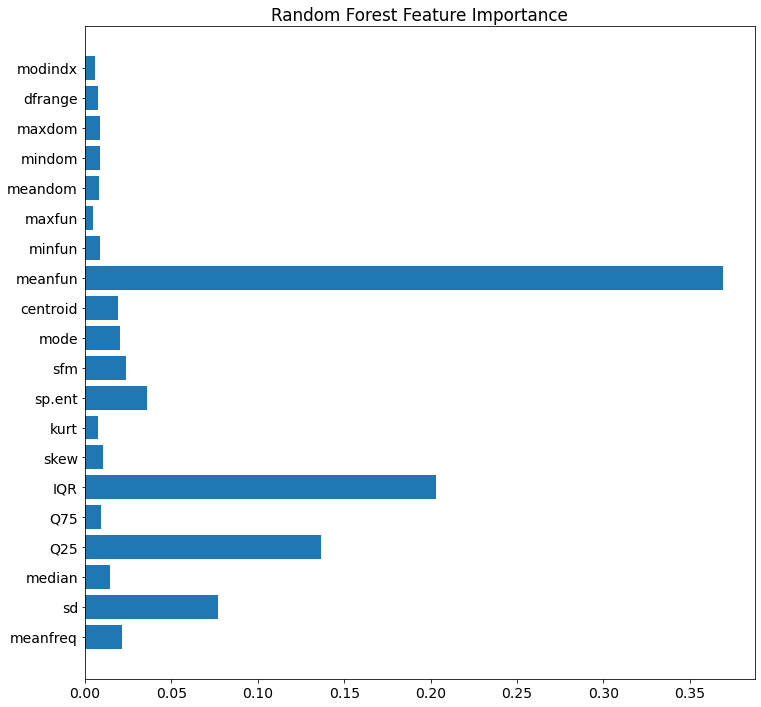

In [14]:
import matplotlib.pyplot as plt

#用來放除了 label 外的 feature names
names = []
for feature_name in df.columns:
    names.append(feature_name)

#label不會是重要的屬性之一
names.remove("label")

#將資料放入模型訓練
clf1.fit(X,y)
#調整字體大小
plt.rc('font', size=14)
#調整繪製圖的大小
plt.figure(figsize=(12,12))
#clf1.feature_importances_ 可以知道重要屬性是誰
plt.barh(names, clf1.feature_importances_)
#圖的標題
plt.title("Random Forest Feature Importance")
#畫出圖
plt.show()